<h1><center>汕头大学实验报告</center></h1>

<table>
<tr>
<th>学号</th><th>姓名</th>
</tr>
<tr>
<td>2015101017</td><td>李柱霖</td>
</tr>
</table>

### 实验内容：

 **一. 实验要求  
 二. 实验步骤  
 三. 实验总结**  

一.实验要求

1.已给f(x)=1/(1+sin x), 在[0, 1]区间取h=1/3和h=1/5.，分别用拉格朗日插值及牛顿插值为基底，计算f(0.4366)的值并估计截断误差。比较两种插值函数的形式,误差估计的形式，并用图型表示结果（语言不限)  
2.（龙格现象）
在区间[－5，5]上取节点数n=11，等距离h=1的节点为插值点，对于函数
                 f(x)=5/(1+x^2)
进行拉格朗日插值和差分插值，把f(x)与插值多项式的曲线画在同一张图上.

**二.实验步骤**

### 第一小题 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [16]:
def f(x):
    return 1.0/(1+math.sin(x))

In [17]:
# 定义拉格朗日公式：
def lagrange(lx,ly,x):
    if len(lx)<2 or len(ly)<2: # 注意了在这里的话，这个长度一定要是大于等于2的，因为从原理上讲的话，如果一点的话，那是无法确定任何的线段的，也没有任何的意义。
        print "the length of list is not enough!"
        return 0
    sum =0
    for k in range(len(lx)):
        inner = 1.0
        for j in range(len(lx)):
            if j!=k:
                inner *= (x-lx[j])*1.0/(lx[k]-lx[j])
        sum += ly[k]*inner
    return sum
            
            

#### 以下是h=1/3的拉格朗日插值的计算。

In [18]:

print 'x is',x
print f(0.4366),f(x)
print u'得到的插值的结果是 ',y,'\n',u'误差是',f(x)-y

x is 0.4366
0.702809412181 0.702809412181
得到的插值的结果是  0.701953997332 
误差是 0.000855414848541


#### 以下是h= 1/5的拉格朗日插值的计算

In [19]:
x =0.4366
# print f(x),f(0.4366)
lx = np.array([0,1.0/3,2.0/3,1],dtype = 'float')
ly = np.array([f(i) for i in lx])
# print "the lx is ",lx,'\n',"the ly is ",ly,'\n'
y = lagrange(lx,ly,x)

lx1 = np.array([0,1.0/5,2.0/5,3.0/5,4.0/5,1],dtype = 'float')
ly1 = np.array([f(i) for i in lx1])
# print "the lx is ",lx,'\n',"the ly is ",ly,'\n'
y1 = lagrange(lx1,ly1,x)
print '当h=1/3时：'
print '拉格朗日插值是：',y,'\n误差为：',f(x)-y
print '当h=1/5时：'
print u'拉格朗日插值是：',y1,u'\n误差为：',f(x)-y1

当h=1/3时：
拉格朗日插值是： 0.701953997332 
误差为： 0.000855414848541
当h=1/5时：
拉格朗日插值是： 0.702815473834 
误差为： -6.06165297601e-06


#### 以下是牛顿插值法

In [20]:
# 计算相乘的部分。
def w(lx,x):
    if len(lx)<2:
        return 1
    else:
        multi = 1.0
        for i in range(len(lx)-1):
            multi *= (x- lx[i])
        return multi

In [21]:
# 计算均差的部分。
def juncha(lx,ly):
    if len(lx)>2 and len(ly)>2 :
        return (juncha(lx[:len(lx) - 1], ly[:len(ly) - 1]) - juncha(lx[1:len(lx)], ly[1:len(ly)])) / float(lx[0] - lx[-1])
    elif len(lx)==1:
        return ly[0]
    else:
        return (ly[1]-ly[0])/float((lx[1]-lx[0]))

In [22]:
# 检测这个求的均差对不对
la = np.array([1,4,9],dtype = 'float')
lb = np.array([1,2,3],dtype = 'float')
print juncha(la,lb)
print 1.0/60
print u'说明方差的计算是没有错误的。'

-0.0166666666667
0.0166666666667
说明方差的计算是没有错误的。


In [23]:
# 整合均差和w部分的计算。
def newton(lx,ly,x):
    if len(lx)==1:
        return ly[0]
    sum = ly[0]
    for i in range(len(lx)-1):
        sum += juncha(lx[:i+2],ly[:i+2])*w(lx[:i+2],x) # 注意这里是要加上2的如果，len(lx)=2,lx[:2],变为[0,1]
    return sum

In [24]:
# 测试结果
l1 = np.array([1,4,9])
l2 = np.sqrt(l1)
print newton(l1,l2,5)

2.26666666667


In [25]:
lx = np.array([0,1.0/5,2.0/5,3.0/5,4.0/5,1],dtype = 'float')
ly = np.array([f(i) for i in lx])
print "the lx is ",lx,'\n',"the ly is ",ly,'\n'
y = newton(lx,ly,x)
print u'插值的结果是：',y,'\n正确结果是：',f(x),u'\n误差是：',f(x)-y

the lx is  [ 0.   0.2  0.4  0.6  0.8  1. ] 
the ly is  [ 1.          0.83425844  0.71972564  0.63912364  0.58229042  0.54304413] 

插值的结果是： 0.702815473834 
正确结果是： 0.702809412181 
误差是： -6.06165297601e-06


In [31]:
lx = np.array([0,1.0/5,2.0/5,3.0/5,4.0/5,1],dtype = 'float')
ly = np.array([f(i) for i in lx])
# print "the lx is ",lx,'\n',"the ly is ",ly,'\n'
y = newton(lx,ly,x)
print '当h=1/3时：'
print u'牛顿插值是：',y,u'\n误差是：',f(x)-y
# print f(x),f(0.4366)
print
lx1 = np.array([0,1.0/3,2.0/3,1],dtype = 'float')
ly1 = np.array([f(i) for i in lx1])
y1 = newton(lx1,ly1,x)
print "当h=1/5时："
print u'牛顿插值是：',y1,'\n',u'误差是',f(x)-y1

当h=1/3时：
牛顿插值是： 0.702815473834 
误差是： -6.06165297601e-06

当h=1/5时：
牛顿插值是： 0.701953997332 
误差是 0.000855414848541


#### 图形表示两种插值函数和原函数

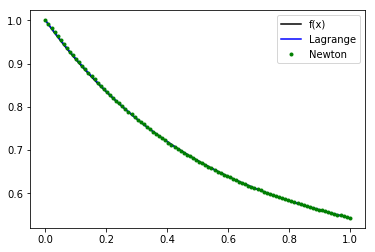

In [14]:
lxx = np.linspace(0,1,100)
lyy = np.array([f(i) for i in lxx])
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(lxx,lyy,'k',label= 'f(x)')
ax1.plot(lxx,lagrange(lx,ly,lxx),'b-',label = 'Lagrange')
ax1.plot(lxx,newton(lx,ly,lxx),'g.',label = 'Newton')
ax1.legend(loc = 'best')

### 第二小题

In [15]:
def f2(x):
    return 5.0/(1+x**2)

In [16]:
lx2 = np.linspace(-5,5,11)
ly2 = f2(lx2)

In [17]:
lxx = np.linspace(-5,5,100)
lyy = f2(lxx)

#### 图形显示

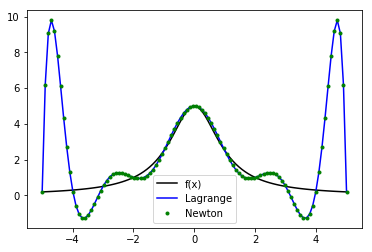

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(lxx,lyy,'k',label = 'f(x)')
ax.plot(lxx,lagrange(lx2,ly2,lxx),'b-',label = 'Lagrange')
ax.plot(lxx,newton(lx2,ly2,lxx),'g.',label = 'Newton')
ax.legend(loc = 'best')

由此可以看出所谓的龙格现象：当进行高指数的插值时，拉格朗日插值函数和牛顿插值函数在两个端点的值距离原函数的值差距是比较大的。

#### 三.总结

进行高指数的插值时，很容易出现龙格现象，避免这种情况的发生应使用分段插值。